In [13]:
import json
import math
import matplotlib.pyplot as plt

#opening the json file
with open('resultsCLP_ICSN.json') as json_file:
    data = json.load(json_file)
print(data)
#print(data['ligand5']['receptor_multimer_results__ligand5_ligand5_out']['energy'])


#fonction to calculate RMSD
def distance(x1,y1,z1,x2,y2,z2):
    d = math.sqrt(pow(x2 - x1, 2) +
                pow(y2 - y1, 2) +
                pow(z2 - z1, 2) * 1.0);
    return d

#variables
list_store = []
listligand = []
resultstore = []
energysave = []

#coordinates of resid 110
coordxfmn = 117
coordyfmn = 74
coordzfmn = 1
nomreceptors = ["6cn8_rufomycin_align_clean_obabel_","3wdc_Cyclomarin_align_clean_obabel_","6pbs_ecumicin_align_clean_obabel_"]

#double for loop to iterate through the ligands/receptors
rmsdsort = []
for x in range(5):
    rmsdsort.append([])

for x in range(1,5000):
    
    list_store.append([x-1])
    nameligand = "outputfile"+str(x)
    storermsd = []
    coordreference = []
    
    for y in range(len(nomreceptors)):   
        try:
            namereceptor = nomreceptors[y]+"outputfile"+str(x)+"_"+"outputfile"+str(x)
            print(namereceptor)
            #print(data[nameligand][namereceptor]['energy']) 
            value = data[nameligand][namereceptor]['energy']
            print(value)
            coordxligand = data[nameligand][namereceptor]['coordx']
            coordyligand = data[nameligand][namereceptor]['coordy']
            coordzligand = data[nameligand][namereceptor]['coordz']
            complexity = data[nameligand][namereceptor]['complexity']
            molwt = data[nameligand][namereceptor]['molwt']
            logp = data[nameligand][namereceptor]['logp']

            energysave.append(value)
            #appending results of each receptors into their own list

            if y == 0:

                #storermsd.append(vardist)
                coordreference = [coordxligand,coordyligand,coordzligand]
                storeenergy = []
                storeenergy.append(value)
                vardist= []
                valuedistance = distance(coordxfmn,coordyfmn,coordzfmn,coordxligand,coordyligand,coordzligand)
                vardist.append(valuedistance)
                rmsdsort[y].append([nameligand,namereceptor,value,valuedistance])
                #print(coordreference)
            else:            
                if y == 2:

                    storeenergy.append(value)
                    valueenergy = sum(storeenergy)/5
                    print(nameligand)
                    sorting = sum(storermsd)/5
                    #print(sorting)
                    listligand.append(nameligand)
                    valuedistance = distance(coordxfmn,coordyfmn,coordzfmn,coordxligand,coordyligand,coordzligand)
                    vardist.append(valuedistance)
                    valuevardist = sum(vardist)/5

                    rmsdsort[y].append([nameligand,namereceptor,value,valuedistance])

                    list_store[x-1].append(sorting)
                    list_store[x-1].append(complexity)
                    list_store[x-1].append(logp)
                    list_store[x-1].append(molwt)
                    list_store[x-1].append(valueenergy)
                    list_store[x-1].append(valuevardist)
                    #print(nomligand)
                else:
                    storeenergy.append(value)
                    print(value)
                    valuedistance = distance(coordxfmn,coordyfmn,coordzfmn,coordxligand,coordyligand,coordzligand)
                    vardist.append(valuedistance)
                    storermsd.append(distance(coordreference[0],coordreference[1],coordreference[2],coordxligand,coordyligand,coordzligand))
                    coordreference = [coordxligand,coordyligand,coordzligand]
                    rmsdsort[y].append([nameligand,namereceptor,value,valuedistance])


        except:
            pass
        
        
        
        
        
        
        
        
        
        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




-8.17
-8.17
6pbs_ecumicin_align_clean_obabel_outputfile3156_outputfile3156
-6.42
outputfile3156
6cn8_rufomycin_align_clean_obabel_outputfile3157_outputfile3157
-8.24
3wdc_Cyclomarin_align_clean_obabel_outputfile3157_outputfile3157
-7.77
-7.77
6pbs_ecumicin_align_clean_obabel_outputfile3157_outputfile3157
-7.33
outputfile3157
6cn8_rufomycin_align_clean_obabel_outputfile3158_outputfile3158
-7.19
3wdc_Cyclomarin_align_clean_obabel_outputfile3158_outputfile3158
-7.57
-7.57
6pbs_ecumicin_align_clean_obabel_outputfile3158_outputfile3158
-7.59
outputfile3158
6cn8_rufomycin_align_clean_obabel_outputfile3159_outputfile3159
-8.52
3wdc_Cyclomarin_align_clean_obabel_outputfile3159_outputfile3159
-8.15
-8.15
6pbs_ecumicin_align_clean_obabel_outputfile3159_outputfile3159
-7.98
outputfile3159
6cn8_rufomycin_align_clean_obabel_outputfile3160_outputfile3160
-7.51
3wdc_Cyclomarin_align_clean_obabel_outputfile3160_outputfile3160
-6.91
-6.91
6pbs_ecumicin_align_clean_obabel_outputfile3160_outputfile3160


In [14]:
#sorting the data by energy
for x in range(len(rmsdsort)):
    print(len(rmsdsort[x]))
    
for x in range(len(rmsdsort),0,-1):
    print("x:")
    print(x)
    for y in range(len(rmsdsort[x-1]),0,-1):
        #print(rmsdsort[x-1][y-1])
        if rmsdsort[x-1][y-1][2]>-10:
            rmsdsort[x-1].pop(y-1)
            
for x in range(len(rmsdsort)):
    print(len(rmsdsort[x]))
    


4557
4557
4557
0
0
x:
5
x:
4
x:
3
x:
2
x:
1
1
12
2
0
0


In [16]:
print(rmsdsort[2])

[['outputfile3508', '6pbs_ecumicin_align_clean_obabel_outputfile3508_outputfile3508', -10.19, 111.31191203087388], ['outputfile4444', '6pbs_ecumicin_align_clean_obabel_outputfile4444_outputfile4444', -10.27, 110.44733889173693]]


In [60]:
#adding all data into a dict
dictrmsd = {}
for x in range(len(rmsdsort)):
    for y in range(len(rmsdsort[x])):
        if rmsdsort[x][y][0] not in dictrmsd:
            dictrmsd.update({rmsdsort[x][y][0]: 0})
        if rmsdsort[x][y][0] in dictrmsd:
            dictrmsd[rmsdsort[x][y][0]] = (dictrmsd.get(rmsdsort[x][y][0])+1)

In [88]:
for key in dictrmsd:
    if dictrmsd[key] >= 5:
        print(key)
#data where four of ligand are close to FMN receptor, and their energy are <-10

ligand3277


In [69]:
print(data["ligand3277"])

{'cluster3frame326_results__ligand3277_ligand3277_out': {'energy': -11.67, 'nomligand': 'cluster3frame326_results__ligand3277_ligand3277_out', 'coordx': 233.6521052631579, 'coordy': 206.32263157894738, 'coordz': 315.10350877192985, 'logp': 10.975099999999992, 'molwt': 792.7332615639999, 'complexity': 1.18956879234668}, 'receptor_multimer_results__ligand3277_ligand3277_out': {'energy': -12.53, 'nomligand': 'receptor_multimer_results__ligand3277_ligand3277_out', 'coordx': 233.19473684210524, 'coordy': 206.64175438596493, 'coordz': 313.6592982456141, 'logp': 10.975099999999992, 'molwt': 792.7332615639999, 'complexity': 1.18956879234668}, 'cluster4frame1683_results__ligand3277_ligand3277_out': {'energy': -10.05, 'nomligand': 'cluster4frame1683_results__ligand3277_ligand3277_out', 'coordx': 232.7917543859649, 'coordy': 206.93824561403505, 'coordz': 314.3333333333333, 'logp': 10.975099999999992, 'molwt': 792.7332615639999, 'complexity': 1.18956879234668}, 'cluster1frame2235_results__ligand32

In [85]:
ligandsearch = "ligand4965"
for key in data[ligandsearch]:
    print("receptor: ")
    print(key)
    print("energy: ")
    print(data[ligandsearch][key]["energy"])
        print("energy: ")
    print(data[ligandsearch][key]["energy"])
    coordxligand = data[ligandsearch][key]['coordx']
    coordyligand = data[ligandsearch][key]['coordy']
    coordzligand = data[ligandsearch][key]['coordz']
    distligandsearch = distance(coordxfmn,coordyfmn,coordzfmn,coordxligand,coordyligand,coordzligand)
    print("distance from FMN: ")
    print(distligandsearch)
    

receptor: 
cluster3frame326_results__ligand3277_ligand3277_out
energy: 
-11.67
distance from FMN: 
4.932674177970238
receptor: 
receptor_multimer_results__ligand3277_ligand3277_out
energy: 
-12.53
distance from FMN: 
3.4665655749164177
receptor: 
cluster4frame1683_results__ligand3277_ligand3277_out
energy: 
-10.05
distance from FMN: 
3.784878927379497
receptor: 
cluster1frame2235_results__ligand3277_ligand3277_out
energy: 
-11.11
distance from FMN: 
5.289148786972766
receptor: 
cluster2frame2577_results__ligand3277_ligand3277_out
energy: 
-10.76
distance from FMN: 
6.326631364306076


(array([6.000e+00, 1.000e+01, 3.700e+01, 1.750e+02, 5.170e+02, 1.237e+03,
        2.191e+03, 2.580e+03, 2.295e+03, 1.764e+03, 1.249e+03, 7.740e+02,
        4.940e+02, 2.120e+02, 4.900e+01, 1.100e+01, 1.000e+00, 6.800e+01,
        0.000e+00, 1.000e+00]),
 array([-11.08  , -10.5275,  -9.975 ,  -9.4225,  -8.87  ,  -8.3175,
         -7.765 ,  -7.2125,  -6.66  ,  -6.1075,  -5.555 ,  -5.0025,
         -4.45  ,  -3.8975,  -3.345 ,  -2.7925,  -2.24  ,  -1.6875,
         -1.135 ,  -0.5825,  -0.03  ]),
 <BarContainer object of 20 artists>)

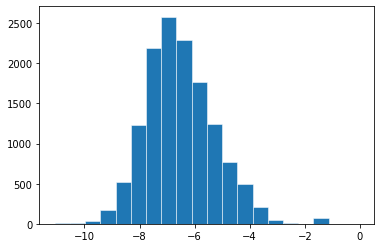

In [5]:
fig, ax = plt.subplots()
ax.hist(energysave, bins=20, linewidth=0.5, edgecolor="white")

(array([2., 0., 0., 0., 1.]),
 array([107.66496219, 110.32249713, 112.98003207, 115.63756701,
        118.29510195, 120.9526369 ]),
 <BarContainer object of 5 artists>)

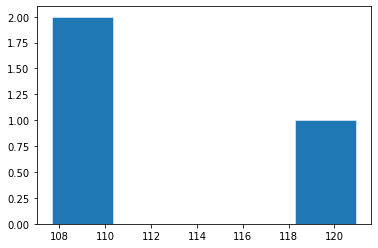

In [6]:
fig, ax = plt.subplots()
ax.hist(vardist, bins=5, linewidth=0.5, edgecolor="white")

In [11]:
print(vardist)

[6.657083853286474]


In [6]:
print(min(energysave))

-17.14
